## sample size calculation

In [16]:
import statsmodels.stats.power as smp

# In the case of t-test(paired two sample for means)
sig = 0.05
power = 0.8
effect_size = 0.8 # (= delta / sd)
alternative='two-sided'
n = smp.tt_ind_solve_power(effect_size=effect_size,  alpha=sig, power=power, alternative=alternative)
print(n)

25.524572500479355


## analysis and visualization

### import library

In [20]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### input data

In [39]:
df = pd.read_csv('bokete_len_data.csv')
high = df['ans_high_len']
low = df['ans_low_len']

### box plot

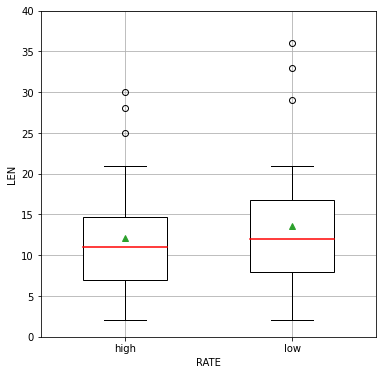

In [64]:
data = [high,low]

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.boxplot(data,
           whis=1,
           patch_artist=True,  
           widths=0.5,  
           boxprops=dict(facecolor='#ffffffff',color='black', linewidth=1),
           medianprops=dict(color='red', linewidth=1.5),
           whiskerprops=dict(color='black', linewidth=1),
           capprops=dict(color='black', linewidth=1),
           flierprops=dict(markeredgecolor='black', markeredgewidth=1),
           showmeans=True
           )
ax.set_xticklabels(['high','low'])

plt.xlabel('RATE')
plt.ylabel('LEN')
plt.ylim([0,40])
plt.yticks([0,5,10,15,20,25,30,35,40])
plt.grid()

plt.show()

### calculate 95 percent confidence interval 

In [62]:
def get_confidence_interval(X):
    a = 0.95 #alpha
    d = len(X)-1 #degree of freedom
    m = np.mean(X) #sample mean
    s = stats.sem(X) #unbiased standard error
    sec = stats.t.interval(alpha=a, df=d, loc=m, scale=s)
    sec_up = np.max(sec) - np.mean(sec)
    return sec_up

### show confidence intervals

<ipython-input-69-01c86dd90e5e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','high','low',''])


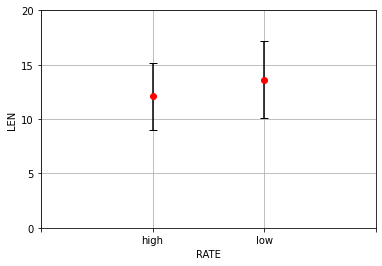

In [69]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)

x_list = [2, 3]
y_list = [high.mean(), low.mean()]

#エラーバーの範囲
interval_list = [get_confidence_interval(high), get_confidence_interval(low)]

#各エラーバーの描画
for x, y, interval in zip(x_list, y_list, interval_list):
    ax.errorbar(x, y, interval, fmt='ro', capsize=4, ecolor='black')

ax.set_xticklabels(['','high','low',''])

plt.xlabel('RATE')
plt.ylabel('LEN')
plt.xticks([1,2,3,4])
plt.yticks([0,5,10,15,20])
plt.grid()

plt.show()


In [68]:
print('mean: high=', high.mean(), 'low=', low.mean())
print('mean: high=', high.std(), 'low=', low.std())
print('confidence: high=', get_confidence_interval(high), 'low=', get_confidence_interval(low))

mean: high= 12.115384615384615 low= 13.615384615384615
mean: high= 7.612237111792686 low= 8.754778914750153
confidence: high= 3.0746491090381944 low= 3.53613173036379


## t-test(paired two sample for means)

In [72]:
stats.ttest_rel(high, low, alternative='two-sided')

Ttest_relResult(statistic=-0.941326257304073, pvalue=0.3555454098366134)

## power calculation

In [35]:
sig = 0.05
effect_size = 0.8
n = 26
alternative='two-sided'
power = smp.TTestIndPower().power(effect_size, n, sig,  alternative=alternative)
print(power)

0.8074866120269494
